# NOTゲート

## ライブラリのインポート

In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# 量子回路
1つのキュビットとビットを用意する

In [2]:
# 回路を用意する。
qc = QuantumCircuit(1, 1)

量子回路を記述

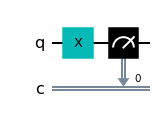

In [3]:
# NOTゲートを追加する。
qc.x(0)
# キュビットを測定する。
qc.measure(0,0)

qc.draw(output='mpl')

# 実行
5キュビットの最も低負荷状態の量子コンピュータを問い合わせ、
試行数をshotsに指定してプログラムを量子コンピューターで実行

In [4]:
# アカウント情報を取得する。
provider = IBMQ.load_account()
# 5キュビットの概要を取得する。
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)
# もっとも負荷の小さな量子コンピュータを選択する。
least_busy_backend = least_busy(small_devices)
print('Least Busy Backend:', least_busy_backend)
# 実行する。(ここでは200回実行する。)
job = execute(qc, least_busy_backend, shots=200)
# 状況を表示する。
job_monitor(job)
# 結果を取得する。
result = job.result()

Least Busy Backend: ibmq_manila
Job Status: job has successfully run


# 結果の確認

結果からビットパターン毎に何回そのパターンとなったかという数を取得.

In [5]:
counts = result.get_counts(qc)
print(counts)

{'0': 8, '1': 192}


## ヒストグラムの表示
ビットパターン毎の集計結果を棒グラフで表示.

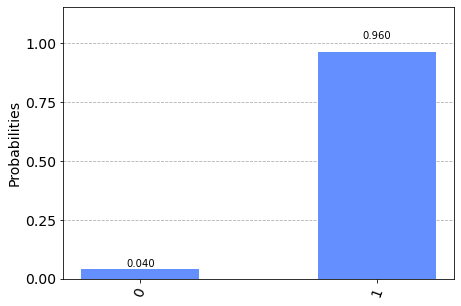

In [6]:
# ビットパターンを棒グラフで表示する。
plot_histogram(counts)